In [4]:
import os
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class multi_nomial(object):
    def __init__(self):
        pass
    def train(self,spam,ham):
        data = {}
        spam_total =0
        ham_total =0
        spam_n    = 0
        ham_n     = 0
        for filename in os.listdir(spam):
            file = open(spam + '\\' +filename,errors='ignore')
            wordcount = Counter(file.read().split())
            for item in wordcount.items():
                if item[0] in data:
                    data[item[0]][0] += item[1]
                else:
                    data[item[0]] = [item[1],0]
                spam_total += item[1]
            spam_n    +=1
            
        for filename in os.listdir(ham):
            file = open(ham + '\\'+filename,errors='ignore')
            wordcount = Counter(file.read().split())
            for item in wordcount.items():
                if item[0] in data:
                    data[item[0]][1] += item[1]
                else:
                    data[item[0]] = [0,item[1]]
                ham_total += item[1]
            ham_n     +=1
        n = len(data)
        for word in data.keys():
            cond_spam  = (data[word][0]+1)/(spam_total-data[word][0] + n-1 )
            cond_ham   = (data[word][1]+1)/(ham_total-data[word][1] + n-1 )
            data[word] = data[word] + [cond_spam,cond_ham]
        self.n = n
        self.ham_total = ham_total
        self.spam_total = spam_total
        self.data = data
        self.prior_spam  = spam_n/(spam_n+ham_n)
        self.prior_ham   = ham_n/(spam_n+ham_n)
        
    def predict(self,text):
        file = open(text)
        wordcount = Counter(file.read().split())
        spam_score = np.log(self.prior_spam)
        ham_score = np.log(self.prior_ham)
        for item in wordcount.items():
            text = item[0]
            count = item[1]
            if text in self.data:
                spam_score += np.log(self.data[text][2])*count
                ham_score  += np.log(self.data[text][3])*count
        self.spam_score = spam_score
        self.ham_score = ham_score
        if spam_score >= ham_score:
            return "spam"
        else:
            return "ham"

In [6]:
spam_train = '.\spam_train'
ham_train  = '.\ham_train'
spam_test  = '.\spam_test'
ham_test   = '.\ham_test' 

In [7]:
model = multi_nomial()
model.train(spam_train,ham_train)

In [8]:
true_positive=0
true_negative=0
false_positive= 0
false_negative =0

In [16]:
for filename in os.listdir(ham_test):
    x = model.predict(ham_test +"//" + filename)
    if x== "ham":
        true_positive +=1
    if x == "spam":
        false_negative +=1

        
for filename in os.listdir(spam_test):
    x = model.predict(spam_test +"//" + filename)
    if x== "spam":
        true_negative +=1
    if x == "ham":
        false_positive +=1

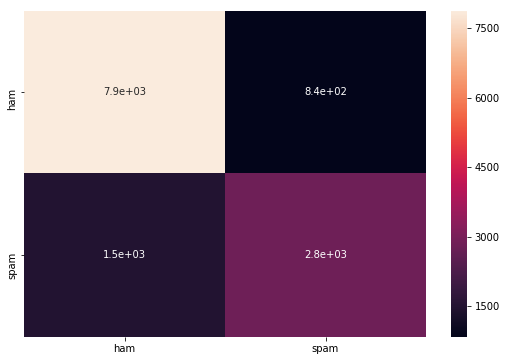

In [19]:
array = [[true_positive,false_negative],[false_positive,true_negative]]
result = pd.DataFrame(array, index = ["ham" , "spam"],
                                columns = ["ham" , "spam"])
plt.figure(figsize = (9,6))
sn.heatmap(result,annot=True)

In [20]:
accuracy = (true_positive + true_negative)/(true_positive+true_negative
                                            +false_positive+false_negative)

In [21]:
accuracy

0.8208978091006588